In [1]:
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Use engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# use an existing database and table
Base = automap_base()

Base.prepare(engine, reflect=True)

In [5]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

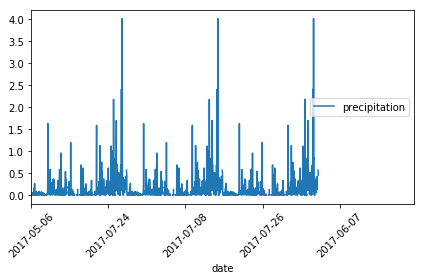

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
prev_year = dt.date.today() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [9]:
# Calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,1701.000000
mean,0.129347
std,0.302928
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [10]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(27)]

In [11]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 11088),
 ('USC00519397', 10896),
 ('USC00513117', 10836),
 ('USC00519523', 10676),
 ('USC00516128', 10448),
 ('USC00514830', 8808),
 ('USC00511918', 7916),
 ('USC00517948', 5488),
 ('USC00518838', 2044)]

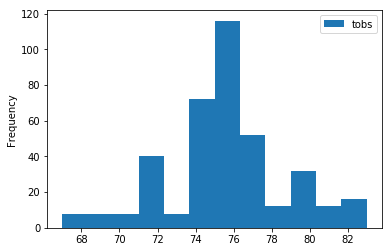

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

prev_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.show()

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-01-01', '2018-01-01'))

[(58.0, 74.14387974230493, 87.0)]


In [28]:
# Use function `calc_temps` to calculate the tmin, tavg, and tmax 

prev_year_start = dt.date(2017, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

56.0 74.0584470989761 84.0


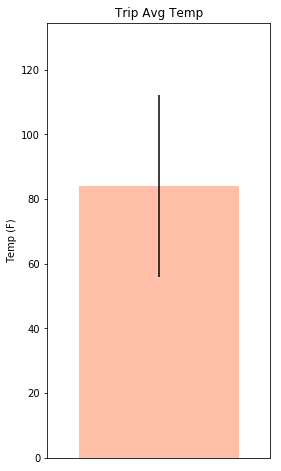

In [29]:
# Plot the results from your previous query as a bar chart. 

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

plt.show()